### This will be in the prepare module
    _Check for and remove duplicates by customer_id. - None
    
    _Remove redundant columns: payment_type_id, internet_service_type_id, contract_type_id, & customer_id. - Completed
        -Used the following to drop redundant columns
        -df = df.drop(['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], axis = 1)
        -df.head(2)
    
    _Encode payment_type(Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)), internet_service_type(DSL, Fiber, None), contract_type(Month-to-month, One year, Two year), gender(male/female), partner(yes/no), multiple_line(yes/no), device_protection(yes/no), tech_support(yes/no), streaming_tv(yes/no), streaming_movies(yes/no), paperless_billing, & churn (yes/no).
    - gender is male(1) or not male(0)
    - yes(1) no(0)
    - payment, contract and service types (True = 1) (Fales = 0)
    
    _Check for nulls and fill (Fill in total_charges' blanks with 0). - Completed
        -#find empty values. Tried isna, isnull, notna, notnull but did not shown any matches.
            -df.eq(' ').sum()
        -Used .replace to empty values with a 0 in total charges.
            -df = df.replace({'total_charges': ' '}, 0)
            -df.head()

    _Convert total_charges to float64. - Completed
        -#convert 'total_charges' to float and validate change.
        - df['total_charges'] = df['total_charges'].astype(float)
        - df.dtypes
    
    _Replace 'No phone service' & 'No internet service' with 'No'. - Completed
        -df.replace(to_replace = 'No internet service', value = 'No')
        -df.replace(to_replace = 'No phone service', value = 'No')

In [1]:
#libraries
import get_db
import explore
import prepare
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import graphviz
from graphviz import Graph
from explore import get_metrics_bin

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Plan
    Goal: Identify feature(s) that cause the greatest churn.
    
    Churn rate is 26.5% (1869) of 7043 customers.
    
    Taking you through the data pipeline I will begin with acquiring the telcor data from the get_db.py module, prepare it using the prepare.py module, split the data and on through exploration. Using explore.py module I identified a set of features used to develop my initial hypothesis. Once cleaned I ran it through multivariate to compare features to help with testing the listed inital hypothesis. Each exploration will include takeaways that have led to preparing, cleaning and testing of the data resulting in either rejecting or failing to reject the final hypothesis.
    
    Features within my hypothesis have been split, tested and modeled in order to provide a recommendation on the final hypothesis in order to reduce churn rates based rejected or failed to reject of the hypothesis. 
    
    I have also identified unknown variables that at a later time can be researched, developed and tested using this model to predict future churn.
    
    I will split my dataframe using train, validate and test.
    
    To explore the data using Univariate, Bivariate and Multivariate methods.
    
    In testing my hypothesis I'll be using chi2, pearsonr, and ttest methods.
    
    For modeling I'll be using DecisionTreeClassifier, RandomForrestClassifier, KNeighborsClassifier, and Logistics Regression.
    
    My methodology follow is the data pipeline; plan, acquire, prepare, explore, model and deliver.

    My hypothesis are listed below:
    
    1. Churn is dependent of whether or not customers are on fiber. (chi2)
        * Null: Churn is independent of whether or not a customer are on fiber.
        * Alternate: churn is dependent of whether or not customers are on fiber.               
    
    2. Tenure and monthly charges are linearly correlated. (pearsonr)
        * Null: Tenure and monthly charges are not linearly correlated.
        * Alternate: Tenure and monthly charges are linearly correlated.
                
    3. Churn is dependent younger customers. (chi2)
        * Null: Churn is independent of younger customers.
        * Alternate: Churn is dependent of younger customers.
        
    4. Do you younger customers pay more then the older customers. (ttest 1samp)
        * Null: The average monthly charges for younger customers is no different than the population.
        * Alternate: The average monthly charges for younger customers are different than the population.
            
    5. Do younger customers churn more than older customers? (ttest 1samp)
        * Null: Younger customer churn is no different than the older population.
        * Alternate: Younger customer churn is different than the older population.
    
    6. Do single customers churn more than non single customers?  (ttest 1samp)
        * Null: Single customer churn is no different than the non single population.
        * Alternate: Single customer churn is different than the non single population.
    
    7. Is churn dependent on autopayment? (chi2)
        * Null: Churn is independent of whether or not customes are enrolled in the autopayment plan.
        * Alternate: Churn is dependent of whether or not customes are enrolled in the autopayment plan.
            
    8. Is churn dependent on phone_service? (chi2)
        * Null: Churn is independent on phone services.
        * Alternate: Churn is dependent on phone services.
            
    FINAL HYPOTHESIS:

    Customers who are young, single, on fiber, has phone service, on m2m, and not enrolled in a autopayment plan are more likely to churn than those customers that do not fall in this category. (ttest 1samp)
        * Null: Customers who are young, single, on fiber, has phone service, on m2m, and not enrolled on the autopayment plan are no different than the rest of the population.
        * Alternate: Customers who are young, single, on fiber, has phone service, on m2m, and not enrolled on the autopayment plan is different than the rest of the population.
        
    Statisitical Test:
        1. chi2
        2. pearsonr
        3. ttest
        
    Exploration:
        1. Univariate
        2. Bivariate
        3. Multivariate

    Modeling:
        1. Decision Tree
        2. Random Forrest
        3. KNN
        4. Logistics Regression
        
    Conclusion
        In conclusion, we ran through the data pipeline, identified our initial hypothesis, split, tested and modeled our features that resulted in the following recommendations.
        1.
        2.
        3.

# *Working code for project*

# Acquire

In [2]:
df = get_db.get_telco_data()
df.head()

,payment_type_id,payment_type,internet_service_type_id,internet_service_type,contract_type_id,contract_type,customer_id,gender,senior_citizen,partner,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn
0,1,Electronic check,1,DSL,1,Month-to-month,0015-UOCOJ,Female,1,No,...,Yes,No,No,No,No,No,Yes,48.20,340.35,No
1,1,Electronic check,1,DSL,1,Month-to-month,0023-HGHWL,Male,1,No,...,No,No,No,No,No,No,Yes,25.10,25.1,Yes
2,1,Electronic check,1,DSL,1,Month-to-month,0067-DKWBL,Male,1,No,...,Yes,No,No,No,No,No,Yes,49.25,91.1,Yes
3,1,Electronic check,1,DSL,2,One year,0083-PIVIK,Male,0,No,...,Yes,Yes,Yes,Yes,Yes,No,No,81.25,5567.55,No
4,1,Electronic check,1,DSL,1,Month-to-month,0096-BXERS,Female,0,Yes,...,No,No,No,No,No,No,No,50.35,314.55,No


#### Initial visualization

##### TAKEAWAYS 

    -Related services:
        *multiple_services relates to phone_services
        *online_security, online_backup, device_protection, tech_support, streaming_tv, and streaming_movies relate to internet services. 

# Prepare

    The prepare.py file is broke up by sections to identify at which stage of the pipeline that I decided to edit, alter, modify or delete colums, column names, data types, etc...and are identifed by notes within the code.
    * Initial clean up was done just after initial visualization of raw data.
    * All other decisions to modify the dataframe are annotated within the prepare.py module.

In [3]:
df = prepare.clean_data(df)
df.head()

,tenure,monthly_charges,fiber,m2m,is_senior,churned,phone_service,online_security,online_backup,device_protection,tech_support,autopayment,not_single
0,7,48.20,0,1,1,0,1,1,0,0,0,0,0
1,1,25.10,0,1,1,1,0,0,0,0,0,0,0
2,2,49.25,0,1,1,1,1,1,0,0,0,0,0
3,64,81.25,0,0,0,0,1,1,1,1,1,0,0
4,6,50.35,0,1,0,0,1,0,0,0,0,0,1


In [4]:
#added less than one year 'tenure_le2_1year' and monthly charges greater than 65.15 'monthly_charges_le2_1year' 
#to the df after exploring the multivariate results to test new hypothesis listed below.

df['tenure_le2_1year_m2mGR65'] = (((df['tenure'] <= 12) == True) & ((df['monthly_charges'] > 65.15) == True) & ((df['churned'] == 1) == True)).astype(int)
df.head()

,tenure,monthly_charges,fiber,m2m,is_senior,churned,phone_service,online_security,online_backup,device_protection,tech_support,autopayment,not_single,tenure_le2_1year_m2mGR65
0,7,48.20,0,1,1,0,1,1,0,0,0,0,0,0
1,1,25.10,0,1,1,1,0,0,0,0,0,0,0,0
2,2,49.25,0,1,1,1,1,1,0,0,0,0,0,0
3,64,81.25,0,0,0,0,1,1,1,1,1,0,0,0
4,6,50.35,0,1,0,0,1,0,0,0,0,0,1,0


# Split data into train, validate, and test samples.
    The resulting dataframes are 3 samples:
    
        1. A dataframe for training the algorithms.
            * The train dataset is for training our models. We also perform our exploratory data analysis on train.
            
        2. A dataframe for validating the models developed on unseen data.
            * First, it is an "out of sample" dataset so that we can evaluate our models on unseen data to measure how well the model generalizes.
            * Second, the validate set allows us to fine tune our hyperparameters.
            
        3. A dataframe for testing the best performing model to ensure the model is able to be generalized on a final set of unseen data not 'overfitting' train, a validate and a test, roughly a 70%:20%:10% split.
            * Final out of sample dataset used to evaluate how well the models tuned on validate generalize on unseen data.

In [5]:
train, validate, test = prepare.train_validate_test_split(df, 'tenure_le2_1year_m2mGR65')

# Exploratory
    1. Discover features, using  that have the largest impact on the target variable to discover patterns, spot anomalies, test hypotheses and check assumptions.
        *The dataframe resulting from these functions should are ready to be used in modeling.
        *Attributes are reduced to features, features are in a numeric form, there are no missing values, and continuous and/or ordered values are scaled to be unitless.
        
    2. Hypothesize: Form and documented initial hypothises about how the predictors (independent variables, features, or attributes) interact with the target (y-value or dependent variable).
    
    3. Used visualization techniques to identify drivers and follow up with a statistical test.
    
    4. Test Hypothesis (t-tests, correlation, chi-square)

In [6]:
#list all categorical variables and quatintative variables for exploration within the train df.
cat_vars = ['fiber', 'm2m', 'is_senior', 'churned', 'not_single', 'phone_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'autopayment']
quant_vars = ['tenure', 'monthly_charges']

## Univariate Stats
    1. Descriptive stats, frequencies, histograms.    
        * Explore the target variable.
        * Explore the categorical/qualitative variables.
        * Explore the continuous/quantitative variables.

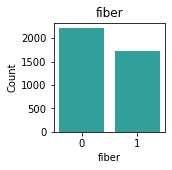

   fiber  Count  Percent
0      0   2213    56.12
1      1   1730    43.88
_________________________________________________________________


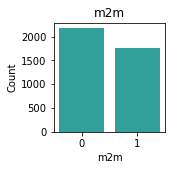

   m2m  Count  Percent
1    0   2176    55.19
0    1   1767    44.81
_________________________________________________________________


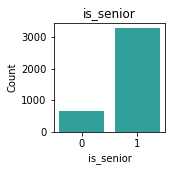

   is_senior  Count  Percent
0          1   3280    83.19
1          0    663    16.81
_________________________________________________________________


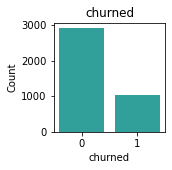

   churned  Count  Percent
0        0   2907    73.73
1        1   1036    26.27
_________________________________________________________________


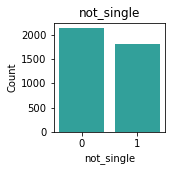

   not_single  Count  Percent
1           0   2138    54.22
0           1   1805    45.78
_________________________________________________________________


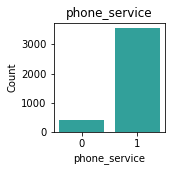

   phone_service  Count  Percent
1              1   3549    90.01
0              0    394     9.99
_________________________________________________________________


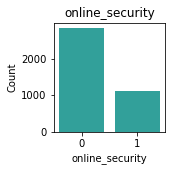

   online_security  Count  Percent
0                0   2832    71.82
1                1   1111    28.18
_________________________________________________________________


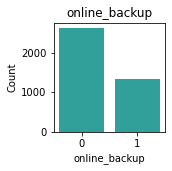

   online_backup  Count  Percent
0              0   2611    66.22
1              1   1332    33.78
_________________________________________________________________


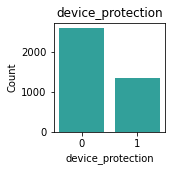

   device_protection  Count  Percent
0                  0   2592    65.74
1                  1   1351    34.26
_________________________________________________________________


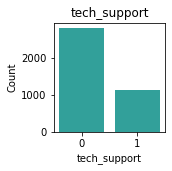

   tech_support  Count  Percent
0             0   2805    71.14
1             1   1138    28.86
_________________________________________________________________


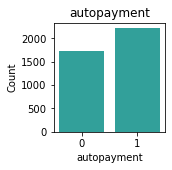

   autopayment  Count  Percent
0            1   2219    56.28
1            0   1724    43.72
_________________________________________________________________


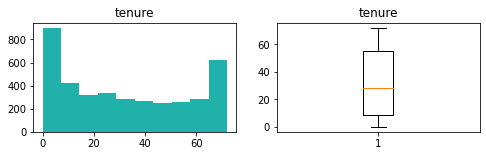

count    3943.000000
mean       32.301040
std        24.488743
min         0.000000
25%         9.000000
50%        28.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


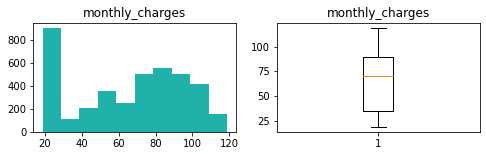

count    3943.000000
mean       64.697274
std        30.036963
min        18.700000
25%        35.200000
50%        70.400000
75%        89.775000
max       118.750000
Name: monthly_charges, dtype: float64


In [7]:
explore.explore_univariate(train, cat_vars, quant_vars)

##### TAKEAWAYS
    Takeaways on trained data
    - For future consideration study online_security, online_backup, device_protectio, and tech_support and how they affect internet type and churn rates.
    - Looking at tenure we see that we loss customers between 0-12 by the evening out of the bar plots. 
    
    8/28/2021
    Of the TRAIN data (Initial discovery):
    - 44.43% (1752) of customers are on fiber
    - 54.78% (2160) of customers are m2m 
    - 82.7% (3261) of customers are not senior
    - 26.53% (1046) of customers churned
    - 46.79% (1845) of customers are not single
    - is_male is an even distribution. DROPPED this column.
    - Customers with a 'partner' similarly divided (47.6 & 52.6 respectively)
    - Customers with 'dependents' account for 70.1%
    - Customers with 'phone_service_ account' for 91%
    - autopayment accounts for 56.81% (2240) of customers 43.19% (1703) are not on autopayment.
    - phone and internet services will be used at a later time.
    - average tenure 32.32%
    - average monthly_charges 65.15%
    
    -Initial assessment during prepare stage of the pipeline.
        - m2m - 2160 or 55%, 1 year - 811 or 21%, 2 year - 972 or 24%
            *change contract type to m2m (yes or no) and drop one and two year contracts.
            *assumption is that if it is not m2m plan all others are on a contract.
        - payment type - change to autopayment and drop 'credit_card', 'bank_transfer', check' and 'e_check'
        -interent type:
            *change internet type to fiber (Yes or No).
            *Because there was only 61 customers with no internet that churned as validated in the Bivariate stats below.
            *assumption, based on hypothesis, is that a customer is on fiber or not on fiber. 

# Initial Hypothesis Testing

In [8]:
alpha = .05

#####    1. Churn is dependent of whether or not customers are on fiber. (chi2)
        * Null: Churn is independent of whether or not a customer are on fiber.
        * Alternate: churn is dependent of whether or not customers are on fiber.               


In [9]:
Null = 'Churn is independent of whether or not a customer are on fiber.'
Alternate = 'Churn is dependent of whether or not customers are on fiber.'

observed = pd.crosstab(train.churned, train['fiber'])
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('\nExpected\n')
print(expected)
print('\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

print('\n')
if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')


Observed

[[1899 1008]
 [ 314  722]]

Expected

[[1631.54729901 1275.45270099]
 [ 581.45270099  454.54729901]]


chi^2 = 378.8931
p     = 0.0000


We reject the null and accept the alternate: Churn is dependent of whether or not customers are on fiber.


##### 2. Tenure and monthly charges are linearly correlated. (pearsonr)
        * Null: Tenure and monthly charges are not linearly correlated.
        * Alternate: Tenure and monthly charges are linearly correlated.

In [10]:
Null = 'Tenure and monthly charges are not linearly correlated.'
Alternate = 'Tenure and monthly charges are linearly correlated.'

corr, p = stats.pearsonr(train.tenure, train.monthly_charges)

print(f'chi^2 = {corr:.4f}')
print(f'p     = {p:.4f}')

print('\n')
if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')

chi^2 = 0.2413
p     = 0.0000


We reject the null and accept the alternate: Tenure and monthly charges are linearly correlated.


##### 3. Churn is dependent younger customers. (chi2)
        * Null: Churn is independent of older customers.
        * Alternate: Churn is dependent of older customers.

In [13]:
Null = 'Churn is independent of older customers.'
Alternate = 'Churn is dependent of older customers.'

observed = pd.crosstab(train.churned, train['is_senior'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed.values)
print('\nExpected\n')
print(expected)
print('\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

print('\n')
if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')

Observed

[[2527  380]
 [ 753  283]]

Expected

[[2418.1993406  488.8006594]
 [ 861.8006594  174.1993406]]


chi^2 = 109.7869
p     = 0.0000


We reject the null and accept the alternate: Churn is dependent of older customers.


##### 4. Do you younger customers pay more then the older customers? (ttest 1samp)
        * Null: The average monthly charges for younger customers is no different than the population (monthly_charges_mean)
        * Alternate: The average monthly charges for younger customers are different than rest of the population.

In [14]:
Null = 'The average monthly charges for younger customers is no different than the population.'
Alternate = 'The average monthly charges for younger customers are different than the population.'

older_monthly_charges = df[df.is_senior == 0].monthly_charges
monthly_charges_mean = df.monthly_charges.mean()

test_results = stats.ttest_1samp(older_monthly_charges, monthly_charges_mean)

if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')

We reject the null and accept the alternate: The average monthly charges for younger customers are different than the population.


##### 5. Do younger customers churn more than older customers? (ttest 1samp)
        * Null: Younger customer churn is no different than the older population.
        * Alternate: Younger customer churn is different than the older population.

In [15]:
Null = 'Younger customer churn is no different than the older population.'
Alternate = 'Younger customer churn is different than the older population.'
            
older_churn = df[df.is_senior == 0].churned
churn_mean = df.churned.mean()

test_results = stats.ttest_1samp(older_churn, churn_mean)

if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')

We reject the null and accept the alternate: Younger customer churn is different than the older population.


##### 6. Do single customers churn more than non single customers?  (ttest 1samp)
        * Null: Single customer churn is no different than the non single population.
        * Alternate: Single customer churn is different than the non single population.

In [16]:
Null = 'Single customer churn is no different than the non single population.'
Alternate = 'Single customer churn is different than the non single population.'
            
single = df[df.not_single == 0].churned
non_single = df.churned.mean()

test_results = stats.ttest_1samp(single, non_single)

if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')

We reject the null and accept the alternate: Single customer churn is different than the non single population.


##### 7. Is churn dependent on autopayment? (chi2)
        * Null: Churn is independent of whether or not customes are enrolled in the autopayment plan.
        * Alternate: Churn is dependent of whether or not customes are enrolled in the autopayment plan.

In [17]:
Null = 'Churn is independent of whether or not customes are enrolled in the autopayment plan.'
Alternate = 'Churn is dependent of whether or not customes are enrolled in the autopayment plan.'
            
observed = pd.crosstab(train.churned, train['autopayment'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed.values)
print('\nExpected\n')
print(expected)

print('\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

print('\n')
if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')

Observed

[[1442 1465]
 [ 777  259]]

Expected

[[1635.97083439 1271.02916561]
 [ 583.02916561  452.97083439]]


chi^2 = 199.1645
p     = 0.0000


We reject the null and accept the alternate: Churn is dependent of whether or not customes are enrolled in the autopayment plan.


##### 8. Is churn dependent on phone_service? (chi2)
        * Null: Churn is independent on phone services.
        * Alternate: Churn is dependent on phone services.

In [18]:
Null = 'Churn is independent on phone services.'
Alternate = 'Churn is dependent on phone services.'
            
observed = pd.crosstab(train.churned, train['phone_service'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed.values)
print('\nExpected\n')
print(expected)

print('\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

print('\n')
if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')

Observed

[[ 300 2607]
 [  94  942]]

Expected

[[ 290.47882323 2616.52117677]
 [ 103.52117677  932.47882323]]


chi^2 = 1.1847
p     = 0.2764


We fail to reject the null and accept the null: Churn is independent on phone services.


##### Customers who are young, single, on fiber, has phone service, on m2m, and not enrolled in a autopayment plan are more likely to churn than those customers that do not fall in this category. (ttest 1samp)
        * Null: Customers who are young, single, on fiber, has phone service, on m2m, and not enrolled on the autopayment plan are no different than the rest of the population.
        * Alternate: Customers who are young, single, on fiber, has phone service, on m2m, and not enrolled on the autopayment plan is different than the rest of the population.

In [19]:
Null = 'Customers who are young, single, on fiber, has phone service, on m2m, and not enrolled on the autopayment plan are no different than the rest of the population.'
Alternate = 'Customers who are young, single, on fiber, has phone service, on m2m, and not enrolled on the autopayment plan is different than the rest of the population.'
            
customer = train[(train.is_senior == 0) & (train.not_single == 0) & (train.fiber == 1) & (train.m2m == 1) & 
                 (train.phone_service == 1) & (train.autopayment == 0)]
customer_churn = customer.churned
churn = train.churned.mean()

test_results = stats.ttest_1samp(customer_churn, churn)

if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')

We fail to reject the null and accept the null: Customers who are young, single, on fiber, has phone service, on m2m, and not enrolled on the autopayment plan are no different than the rest of the population.


## Bivariate Stats
    1. Plot the interaction of each variable with the target. 
    2. Document takeaways.
    3. Explore interation of independent variables using viz and/or hypothesis testing to address interdependence.

In [27]:
# selecting rows based on condition 
rslt_df = df[df['tenure'] <= 12] 
rslt_df

,tenure,monthly_charges,fiber,m2m,is_senior,churned,phone_service,online_security,online_backup,device_protection,tech_support,autopayment,not_single,tenure_le2_1year_m2mGR65
0,7,48.20,0,1,1,0,1,1,0,0,0,0,0,0
1,1,25.10,0,1,1,1,0,0,0,0,0,0,0,0
2,2,49.25,0,1,1,1,1,1,0,0,0,0,0,0
4,6,50.35,0,1,0,0,1,0,0,0,0,0,1,0
9,5,47.15,0,1,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,11,20.05,0,0,0,0,1,0,0,0,0,1,0,0
7027,4,20.45,0,1,0,0,1,0,0,0,0,1,0,0
7032,1,20.55,0,1,0,0,1,0,0,0,0,1,0,0
7038,4,20.40,0,1,0,0,1,0,0,0,0,1,1,0


In [28]:
train, validate, test = prepare.train_validate_test_split(rslt_df, 'tenure_le2_1year_m2mGR65')

In [29]:
cat_vars = ['fiber', 'is_senior', 'not_single', 'phone_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'autopayment']
quant_vars = ['tenure', 'monthly_charges']

fiber 
_____________________

         chi2        p-value  degrees of freedom
0  689.424415  5.962928e-152                   1

observed:
 tenure_le2_1year_m2mGR65    0    1   All
fiber                                   
0                         710   11   721
1                         141  361   502
All                       851  372  1223

expected:
             0           1
0  501.693377  219.306623
1  349.306623  152.693377


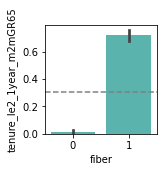


_____________________

is_senior 
_____________________

        chi2       p-value  degrees of freedom
0  53.663806  2.379060e-13                   1

observed:
 tenure_le2_1year_m2mGR65    0    1   All
is_senior                               
0                         771  277  1048
1                          80   95   175
All                       851  372  1223

expected:
             0           1
0  729.229763  318.770237
1  121.770237   53.229763


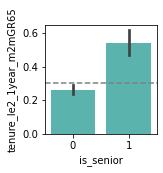


_____________________

not_single 
_____________________

       chi2   p-value  degrees of freedom
0  3.096206  0.078475                   1

observed:
 tenure_le2_1year_m2mGR65    0    1   All
not_single                              
0                         561  265   826
1                         290  107   397
All                       851  372  1223

expected:
             0           1
0  574.755519  251.244481
1  276.244481  120.755519


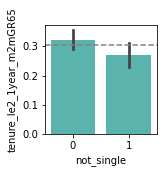


_____________________

phone_service 
_____________________

        chi2       p-value  degrees of freedom
0  59.271965  1.373190e-14                   1

observed:
 tenure_le2_1year_m2mGR65    0    1   All
phone_service                           
0                         125    0   125
1                         726  372  1098
All                       851  372  1223

expected:
             0           1
0   86.978741   38.021259
1  764.021259  333.978741


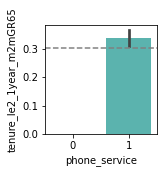


_____________________

online_security 
_____________________

       chi2   p-value  degrees of freedom
0  6.737733  0.009439                   1

observed:
 tenure_le2_1year_m2mGR65    0    1   All
online_security                         
0                         742  344  1086
1                         109   28   137
All                       851  372  1223

expected:
           0         1
0  755.6713  330.3287
1   95.3287   41.6713


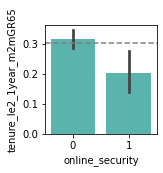


_____________________

online_backup 
_____________________

       chi2   p-value  degrees of freedom
0  0.822618  0.364416                   1

observed:
 tenure_le2_1year_m2mGR65    0    1   All
online_backup                           
0                         728  310  1038
1                         123   62   185
All                       851  372  1223

expected:
             0           1
0  722.271464  315.728536
1  128.728536   56.271464


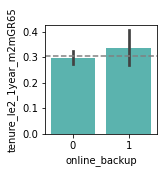


_____________________

device_protection 
_____________________

        chi2   p-value  degrees of freedom
0  18.011134  0.000022                   1

observed:
 tenure_le2_1year_m2mGR65    0    1   All
device_protection                       
0                         753  294  1047
1                          98   78   176
All                       851  372  1223

expected:
             0           1
0  728.533933  318.466067
1  122.466067   53.533933


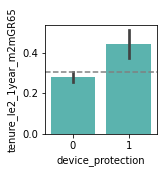


_____________________

tech_support 
_____________________

       chi2   p-value  degrees of freedom
0  4.373388  0.036504                   1

observed:
 tenure_le2_1year_m2mGR65    0    1   All
tech_support                            
0                         730  336  1066
1                         121   36   157
All                       851  372  1223

expected:
             0           1
0  741.754702  324.245298
1  109.245298   47.754702


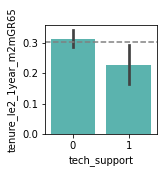


_____________________

autopayment 
_____________________

       chi2   p-value  degrees of freedom
0  0.691494  0.405657                   1

observed:
 tenure_le2_1year_m2mGR65    0    1   All
autopayment                             
0                         662  298   960
1                         189   74   263
All                       851  372  1223

expected:
             0           1
0  667.996729  292.003271
1  183.003271   79.996729


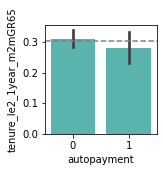


_____________________

tenure 
____________________



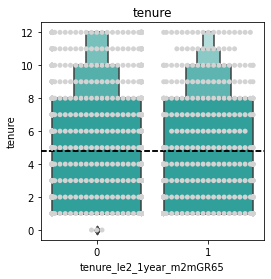

                          count      mean       std  min  25%  50%  75%   max
tenure_le2_1year_m2mGR65                                                     
0                         851.0  4.839013  3.685416  0.0  1.0  4.0  8.0  12.0
1                         372.0  4.599462  3.585430  1.0  1.0  4.0  8.0  12.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=164360.5, pvalue=0.27880502877885827)

____________________

monthly_charges 
____________________



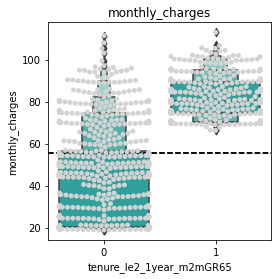

                          count       mean        std    min      25%     50%  \
tenure_le2_1year_m2mGR65                                                        
0                         851.0  43.795300  22.647474  18.85  20.3500  44.600   
1                         372.0  81.982124  10.120508  66.25  74.3875  80.175   

                             75%     max  
tenure_le2_1year_m2mGR65                  
0                         56.275  111.40  
1                         89.500  112.95   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=27033.0, pvalue=4.848043499167261e-118)

____________________



In [30]:
explore.explore_bivariate(train, 'tenure_le2_1year_m2mGR65', cat_vars, quant_vars) 

##### TAKEAWAYS
    Takeaways on hypothesis features
    - validated fiber churn (728/3943 on trained data). What is about fiber service that causes churn. Is it the service or lack of service (online security, online backup, tech support, and device protection). These service maybe include for future use in studying model predictions.
    - m2m churn greater than customers not on a m2m
    - younger customers churn more than senior citizen customers
    - single churn is slightly higher than those that are not single. (Consider dropping in future modeling)
    - customers with phone_service are greatly higher than those that do not have phone service. For future consideration is what affects phone service that causes so much churn. Is it cost? Is it services or lack of service? Is it the network?
    - autopayment has an affect on churn. A recommendation would be to offer an incentive for customers to select the autopayment plan.
    - Tenure churn is more likely in earlier months.
    - Higher monthly charges lead to higher churn.


    8/28/2021
    - On ALL TRAINED data (ran bivariate on all trained data to identify other patterns and anomalies):
    - Number of fiber (728)  customers who churned.
       * what is about our fiber internet service is making customers churn?
       * Less people churn on DSL (257) then on fiber...possible validation that fiber service needs work.
       * DROP no_internet. Only 61 customers who do not have internet churn.

    - DRAFT hypothesis. (NOTE: Initial hypothesis may differ)
    * HYPOTHESIS: Customers on fiber are more likely to churn than those customers not on fiber. 
        ****Convert fiber and DSL into one column - fiber (Yes or No) and encode.

    - 90.5% (929/1231) of customers in the first month churn than any other month
    * HYPOTHESIS: Customers are more than likely to churn in the first month of service than any other customer.
        
    - senior_citizen:
    * HYPOTHESIS: Customers who are NOT senior citizens (765) are more likely to churn than senior citizens (281).
    * In exploration 'senior_citizen' is changed to 'is_senior' to test whether or not younger customers churn.
    
    - Between 'partner' and 'dependents' less single (no_d_863-no_p_687=176) customers churn then not single people (p_359 + d_183 = 542).
    * IN exploration this is changed to 'is_single' to test whether or not single people churn at a higher rate then those customers that are not single.
    
    - Phone service:
    * HYPOTHESIS: Customers with phone_service (951) are more likely to churn than those that do not have phone_service?
        ***DROP multiple_lines. It is evenly weighed and does not have an impact on phone_services.
            
    - Interent services:
        ***DROP streaming services. Streaming services are eveningly weighed and will not affect intenert services and churn.
        
    - Payment type:
    * Converted payment type to autopayment (Yes or No). Assumption is that customers are either on or not on an autopayment plan.can I call you
    * HYPOTHESIS: Customers enrolled in automatic payment plan (266) are less likely to churn than those customers NOT enrolled in the automatic payment plan (780).

    - Lower tenure more churn.
    
    - Higher monthly payments more churn.
   
    - Contract type:
    * Combine  m2m, 1, and 2 year contracts to a single column titled 'm2m' and encode.
    * HYPOTHESIS: m2m churn is greater than those customers not on m2m plan.
        ---------------------------------------------
    QUESTIONS:
        1. Why do customers on fiber churn more?
        2. Why do customers churn more in the first month than any other month?
        3. Why do non single customers (with partner or dependents) churn more then single customers?
        4. Why do younger customers churn more than older customers?
        5. Why do customers on m2m plans churn more than those customers on contracts?
        6. Why do customers enrolled in autopayments churn less than those customers not enrolled in an autopayment?
        7. Why do customers churn more with phone services?
        
        * What do these questions all have in common?
       ** What is the cost per month of a younger customers who is not single, has phone services and fiber, on a m2m plan, enrolled in an autopayment plan?
       
- FINAL HYPOTHESIS: Customers who are young, not single, on fiber, has phone service, on m2m, and not enrolled in a autopayment plan are more likely to churn than those customers that do not fall in this category.

## Multivariate Stats
    1. How subgroups compare to each-other and to the overall population. 
    2. Answer questions using visualizations and/or hypothesis testing.

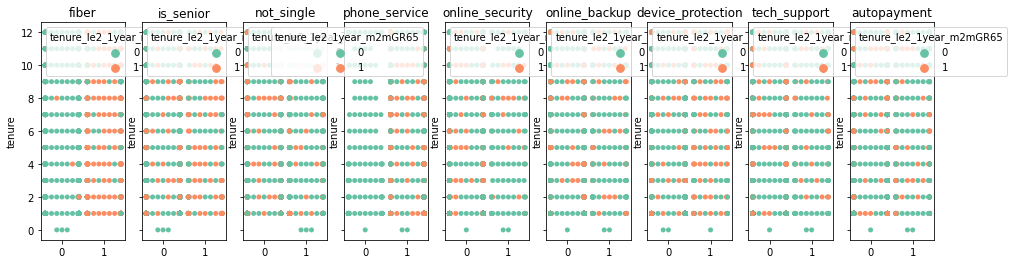

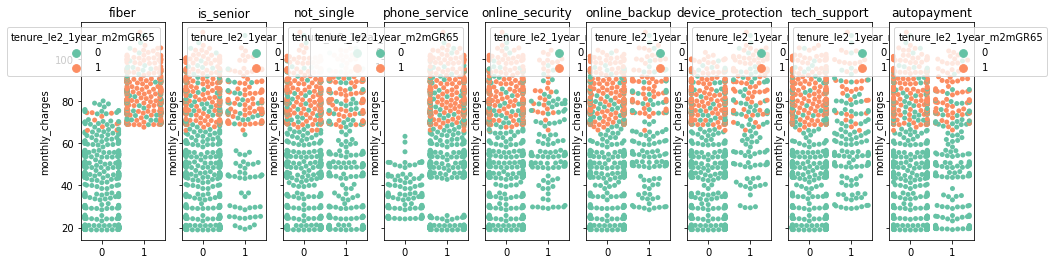

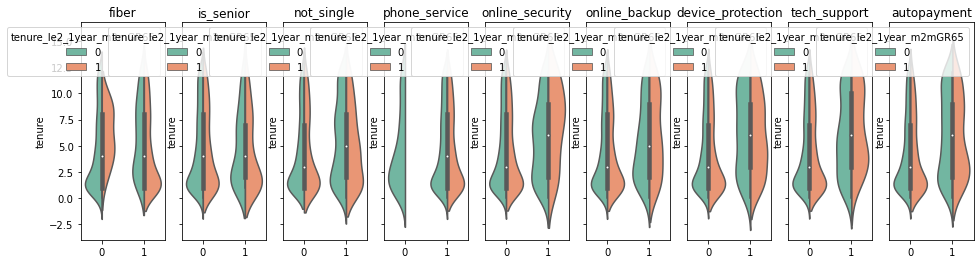

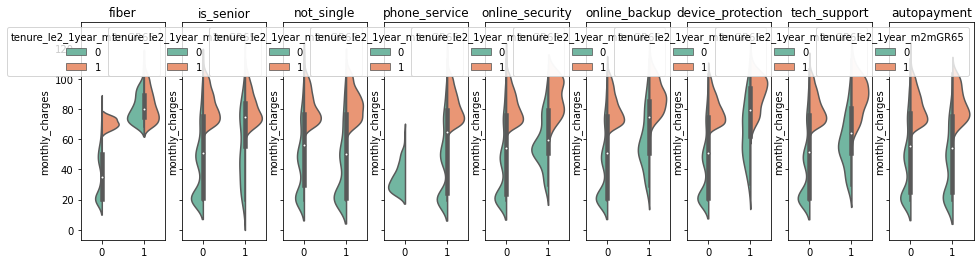

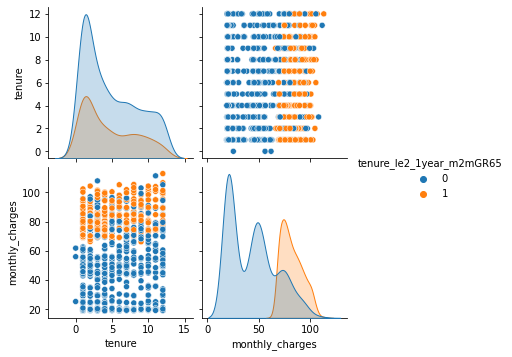

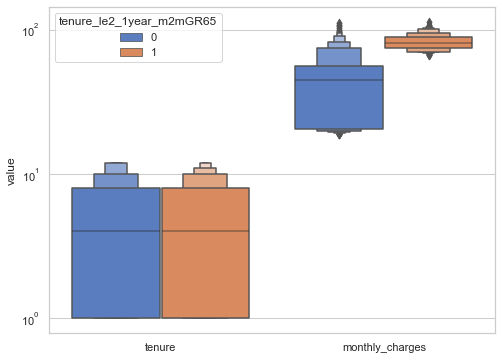

In [31]:
explore.explore_multivariate(train, 'tenure_le2_1year_m2mGR65', cat_vars, quant_vars)

##### TAKEAWAYS

    KEY Takeaways on less than 12 months
        - Seniors churn, but not due to cost.
        - Where younger customers churn in the first 12 months due to higher costs. Which fits our Hyp #5.
        - We also see that online services and wutopayments have little affect on churn in the first 12 months.
        - Customers with phone_services and device_protection seem to churn more in the first 12 months.
        - Churn results from higher charges:
            *Fiber customers pay more (churn happens more for customers who do not have online services.)
            *Are young and single
            *have phone_service (churn happens more for those who do not have device_protection)
            *not on an autopayment plan
       
        
    Takeaways on trained data
    Line and scatter charts
        - Higher concentration of customer churn in earlier months
        - customers who pay higher monthly charges churn more early in tenure

    fisheye
    feature to tenure
        - customers churn early in tenure no matter whether the feature is True or False. With an exception to customers that are on contracts with tenure. This could be due to ending contracts. An incentive could be offered to retain contract customers. Churn in this category is not significant enough for this study.
    feature by Monthly payment
        - Higher monthly charges lead to higher churn rates in every feature True or False
        
    Scatterplots
    - Fiber churn greater at earlier months
    - Customers on Fiber have a higher monthly payment churn more
    - m2m distributed throughout tenure with a slighter higher churn in earlier months
    - m2m customers churn more with higher monthly payments
    - It seems as though seniors who pay more churn in earlier months. (re-focus hypothesis)
    - not_single looks more evenly distrubuted then earlier anticipated in the other tests. (re-focus hypothesis)
    - single customers who churn pay more.
    - although more customers have phone services it seems as though we have a higher concentration of churn in earlier months with those customers who DO NOT have phone services.
    - Customers with phone services churn with a disparity of monthly charges. (consider dropping)
    - There is a higher concentration of churn in the earlier months with those customers that are on the autopayment plan. However, more customers that are NOT on an autopayment plan churn over time.
    - What is common amongst autopayment customers is higher monthly charges.
    

# Final Hypothesis

The following hypothesis was developed in response to both the bivariate and multivariate results.

##### Customers are more likely to churn under one year that pay higher monthly rates. (ttest 1samp)
        * Null: Customers who churn under one year that pay higher monthly rates are NO different than those who stay and pay less.
        * Alternate: Customers who churn under one year that pay higher monthly rates are different than those who stay and pay less.

In [33]:
#churn is dependent of tenure and monthly charges
Null = 'churn is independent of less than 12 month tenure and higher monthly charges' 
Alternate = 'churn is dependent of less than 12 month tenure and higher monthly charges' 

            
observed = pd.crosstab(train.churned, train.tenure_le2_1year_m2mGR65)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed.values)
print('\nExpected\n')
print(expected)

print('\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

print('\n')
if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')

Observed

[[636   0]
 [215 372]]

Expected

[[442.5478332 193.4521668]
 [408.4521668 178.5478332]]


chi^2 = 576.2500
p     = 0.0000


We reject the null and accept the alternate: churn is dependent of less than 12 month tenure and higher monthly charges


# Train, Validate, Test

In [34]:
#Train 
X_train = train[['fiber', 'is_senior', 'not_single', 'phone_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'autopayment']]#features
y_train = train.tenure_le2_1year_m2mGR65
#Validate
X_validate = validate[['fiber', 'is_senior', 'not_single', 'phone_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'autopayment']]#features
y_validate = train.tenure_le2_1year_m2mGR65
#Test
X_test = test[['fiber', 'is_senior', 'not_single', 'phone_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'autopayment']]#features
y_test = train.tenure_le2_1year_m2mGR65

In [35]:
#print of x, y variables shape. In the validate model x, y shape needs to be transposed.
print(X_train.shape,y_train.shape)
print(X_validate.shape,y_validate.shape)
print(X_test.shape,y_test.shape)

(1223, 9) (1223,)
(525, 9) (1223,)
(438, 9) (1223,)


# Baseline

In [36]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.7


# Modeling

## Decision Tree

In [41]:
#Create the model
model = DecisionTreeClassifier(max_depth=5, random_state=123)
#Fit the model
model = model.fit(X_train, y_train)
#Use the model
y_predictions = model.predict(X_train)

#prediction, accuracy, & class report evaluations
get_metrics_bin(model, X_train, y_train)


    The accuracy for our model is 0.8831
    The True Positive Rate is 0.957, The False Positive Rate is 0.149,
    The True Negative Rate is 0.851, and the False Negative Rate is 0.043
    


,precision,recall,f1-score,support
0,0.978378,0.850764,0.910119,851.000000
1,0.737060,0.956989,0.832749,372.000000
accuracy,0.883074,0.883074,0.883074,0.883074
macro avg,0.857719,0.903877,0.871434,1223.000000
weighted avg,0.904977,0.883074,0.886586,1223.000000


## Random Forrest

In [42]:
#Create the Model
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', min_samples_leaf=1, n_estimators=100,
max_depth=5, random_state=123)
#Fit the Model
rf.fit(X_train, y_train)
#Use the Model
y_pred = rf.predict(X_train)

#prediction, accuracy, & class report evaluations
get_metrics_bin(rf, X_train, y_train)


    The accuracy for our model is 0.879
    The True Positive Rate is 0.968, The False Positive Rate is 0.16,
    The True Negative Rate is 0.84, and the False Negative Rate is 0.0323
    


,precision,recall,f1-score,support
0,0.983494,0.840188,0.906210,851.000000
1,0.725806,0.967742,0.829493,372.000000
accuracy,0.878986,0.878986,0.878986,0.878986
macro avg,0.854650,0.903965,0.867852,1223.000000
weighted avg,0.905113,0.878986,0.882875,1223.000000


## KNN

In [43]:
#Create the model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
#Fit the model
knn.fit(X_train, y_train)
#Use the model
y_pred = knn.predict(X_train)

#prediction, accuracy, & class report evaluations
get_metrics_bin(knn, X_train, y_train)


    The accuracy for our model is 0.8782
    The True Positive Rate is 0.952, The False Positive Rate is 0.154,
    The True Negative Rate is 0.846, and the False Negative Rate is 0.0484
    


,precision,recall,f1-score,support
0,0.975610,0.846063,0.906230,851.000000
1,0.729897,0.951613,0.826138,372.000000
accuracy,0.878168,0.878168,0.878168,0.878168
macro avg,0.852753,0.898838,0.866184,1223.000000
weighted avg,0.900871,0.878168,0.881869,1223.000000


## LogRegression

In [44]:
#Create the model
log_reg = LogisticRegression(C=1, random_state=123, intercept_scaling=1, solver='lbfgs')
#Fit the model
log_reg.fit(X_train, y_train)
#Use the model
y_pred = log_reg.predict(X_train)

#prediction, accuracy, & class report evaluations
get_metrics_bin(log_reg, X_train, y_train)


    The accuracy for our model is 0.8757
    The True Positive Rate is 0.97, The False Positive Rate is 0.166,
    The True Negative Rate is 0.834, and the False Negative Rate is 0.0296
    


,precision,recall,f1-score,support
0,0.984743,0.834313,0.903308,851.000000
1,0.719124,0.970430,0.826087,372.000000
accuracy,0.875715,0.875715,0.875715,0.875715
macro avg,0.851933,0.902371,0.864697,1223.000000
weighted avg,0.903950,0.875715,0.879820,1223.000000


# Random Forrest model Validation

In [45]:
#Create the model
model = DecisionTreeClassifier(max_depth=5, random_state=123)
#Fit the model
model = model.fit(X_validate, y_validate)
#Use the model
y_predictions = model.predict(X_validate)

#prediction, accuracy, & class report evaluations
get_metrics_bin(model, X_validate, y_validate)

ValueError: Number of labels=1223 does not match number of samples=525

# Random Forrest model Testing

In [46]:
#Create the model
model = DecisionTreeClassifier(max_depth=5, random_state=123)
#Fit the model
model = model.fit(X_test, y_test)
#Use the model
y_predictions = model.predict(X_test)

#prediction, accuracy, & class report evaluations
get_metrics_bin(model, X_test, y_test)

ValueError: Number of labels=1223 does not match number of samples=438

# Delivery

In [ ]:
telco_customer = pd.concat([train.X_train, train.X_validate, train.X_test], axis= 1)

model_pred = rf.predict(telco_customer)
predicition = pd.Dataframe(model_pred)
prediction.rename(columns={0: 'churn_prediction'}, inplace = True)

model_proba = rf.predict_proba(telco_customer)
prediction_proba = pd.Dataframe(model_proba[0:,1])
prediction_proba.rename(columns={0: 'churn_probability'}, inplace = True)

customer_predictions = pd.concat([telco.customer_id, prediction_proba, prediction], axis=1)

customer_predictions.to_csv("customer_predictions.csv")

# Conclusion


This also a key takeaway....
In conclusion and after the initial hypothesis test, the prediction model of the telco dataset shows customers who churn do so early, under 20 months and have a higher monthly charge. Our initial hypothesis of the train dataset had a baseline accuracy of 73% and highest accuracy in the Random Forrest model of 77.91%. The Random Forrest gave us the best accuracy in which was used to model our validate and test datasets. The validate model returned a 76.88% while our test dataset retun a 78.78% accuracy. With the multivariate test it was decided to scrtach the final hypothesis and model monthly charges and tenure (under 12 months) against churn. 

no matter the feature who pay a higher monthly charge in the earlier months churn at a greater rate than those . 



    - What we don't know:
        * How plans relate to cost. i.e. phone to service plans
        * How service plans (online security, online backup, tech support, device protection, and streaming services) relates to cost.
        * Cost of one line, cost of multiple lines (what is multiple lines? Is it 2, 3, 4, or more) and how that relates to cost.

In [ ]:
print(df.churned.value_counts()), 
print(f'\nTotal datapoints: {df.churned.count()}')
print(df[df.tenure <= 12].churned.value_counts())
print(f'\n Total Datapoints with tenure < 12 months: {df[df.tenure <= 12].churned.count()}')
print(df[df.monthly_charges > 65.15].churned.value_counts())
print(f'\n Total Datapoints with monthly_charges > 65.1: {df[df.monthly_charges > 65.1].churned.count()}')

In [ ]:
df.tenure <= 12

In [ ]:
hyp_df = df[['tenure','churned','monthly_charges']]
hyp_df.head()


In [ ]:
hyp_df['tenure_le2_1year'] = (((df['tenure'] <= 12) == True) & ((df['churned'] == 1) == True)).astype(int)
hyp_df['monthly_charges_le2_1year'] = (((df['monthly_charges'] > 65.15) == True) & ((df['churned'] == 1) == True)).astype(int)
hyp_df.head()

In [ ]:
train1, validate1, test1 = prepare.train_validate_test_split(hyp_df, 'churned')

In [ ]:
cat_vars1 = ['churned', 'tenure_le2_1year', 'monthly_charges_le2_1year']
quant_vars1 = ['tenure', 'monthly_charges']

explore.explore_univariate(train1, cat_vars1, quant_vars1)